In [0]:
# Chocolate Croissant vs Sloth
# Zainab Alasadi
# 12/09/2019

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import os

from PIL import Image
from random import shuffle

# Route train and test directories
TRAIN_DIR = './train'
TEST_DIR = './test'

IMG_SIZE = 300
croissant = 'croissant'
sloth = 'sloth'

# Labels [Croissant, Sloth]
LABELS = {croissant: np.array([1, 0]), 
          sloth: np.array([0, 1])}


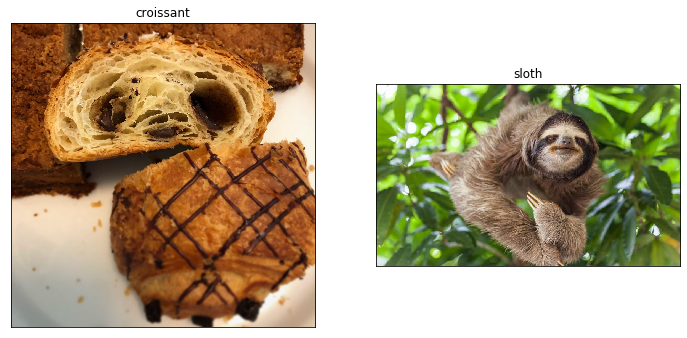

In [22]:
# What do these doggos look like?
croissant_img_1 = Image.open(TRAIN_DIR + "/" + croissant + "_" + "1.jpg") # 46-113
sloth_img_2 = Image.open(TRAIN_DIR + "/" + sloth + "_" + "1.jpg") # 44-108

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1), plt.imshow(croissant_img_1)
plt.title(croissant)
plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(sloth_img_2)
plt.title(sloth)
plt.xticks([]), plt.yticks([])
plt.show()

In [23]:
# Format width and height image data dimensions for 
# input to the keras model
def get_size_stat():
    heights, widths = [], []

    for img in os.listdir(TRAIN_DIR):
        path = os.path.join(TRAIN_DIR, img)

        h, w = np.array(Image.open(path)).shape[:2]
        heights.append(h)
        widths.append(w)

    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print("Average Height:", avg_height)
    print("Max Height:", max(heights))
    print("Min Height:", min(heights))
    print()
    print("Average Width:", avg_width)
    print("Max Width:", max(widths))
    print("Min Width:", min(widths))

# Get basic statistics on image size 
get_size_stat()

Average Height: 463.50694444444446
Max Height: 4032
Min Height: 133

Average Width: 621.0555555555555
Max Width: 4032
Min Width: 168


In [24]:
# Attach labels to each image based on it's filename
def label_img(name):
    if croissant in name:
        return LABELS[croissant]
    elif sloth in name:
        return LABELS[sloth]

In [25]:
def load_training_data():
    train_data = []
    i = 0
    # Loop through each file in the training directory
    for img in os.listdir(TRAIN_DIR):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        img = Image.open(path)
        img = img.convert('L')
        # Last arg is resampling filter
        # ANTIALIAS is a high-quality downsampling filter
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        train_data.append([np.array(img), label])

        # Basic Data Augmentation - Horizontal Flipping
        # Others: random crop, rotation, color changes...
        # Every second image
        if i % 2 == 0:
            flip_img = Image.open(path)
            flip_img = flip_img.convert('L')
            flip_img = flip_img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            flip_img = np.array(flip_img)
            flip_img = np.fliplr(flip_img)
            train_data.append([flip_img, label])

        i += 1

    shuffle(train_data)
    return train_data

train_data = load_training_data()

Number of training images: 216


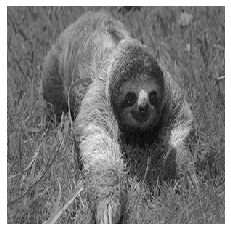

In [26]:
# Print number of training images
# Show a sample image
print("Number of training images:", len(train_data))
plt.imshow(train_data[0][0], cmap='gist_gray')
plt.axis('off')
plt.show()

In [27]:
# Separate the images and the labels
train_images = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
train_labels = np.array([i[1] for i in train_data])

In [28]:
# Import Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np

In [29]:
"""
Create a CNN using Keras Sequential API

5 Convolutional Layers with RELU activation, each followed by a 
pooling layer (max pooling) and then batch normalisation.

Batch Normalization normalizes each batch by both mean and variance reference
Batch norm helps networks train faster converge much more quickly.

At the end, there is a dropout layer (20% dropout)
and two relu dense layers and one final softmax dense layer.

Dropout: a technique where random neurons are ignored during training making
the model less likely to overfit.

Activation: introduces nonlinearity to a system that has essentially 
just been computing linear operations during the conv layers 
(just element wise multiplications and summations).
"""

model = Sequential()
# Conv2D(filters) - number of output filters in the convolution
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
#
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
#
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
#
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
#
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
#
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Output Layer
model.add(Dense(2, activation = 'softmax'))

# LEARNING
# Loss - cross entropy: increases as the predicted probability diverges from 
# the actual label. Ideal when output is a probability value between 0 and 1.
# Optimizer - adam: extension to stochastic gradient descent with an adaptive learning rate.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [30]:
# Fit the model to the training data
model.fit(train_images, train_labels, batch_size=15, epochs=20)  
# validation_split = 0.2

Epoch 1/20
216/216 [==============================] - 21s 96ms/step - loss: 0.7963 - acc: 0.6713
Epoch 2/20
216/216 [==============================] - 19s 90ms/step - loss: 0.2795 - acc: 0.8796
Epoch 3/20
216/216 [==============================] - 19s 90ms/step - loss: 0.1812 - acc: 0.9398
Epoch 4/20
216/216 [==============================] - 19s 90ms/step - loss: 0.0949 - acc: 0.9583
Epoch 5/20
216/216 [==============================] - 19s 90ms/step - loss: 0.0631 - acc: 0.9676
Epoch 6/20
216/216 [==============================] - 20s 91ms/step - loss: 0.0176 - acc: 0.9954
Epoch 7/20
216/216 [==============================] - 19s 90ms/step - loss: 0.0289 - acc: 0.9954
Epoch 8/20
216/216 [==============================] - 20s 91ms/step - loss: 0.0087 - acc: 1.0000
Epoch 9/20
216/216 [==============================] - 19s 90ms/step - loss: 0.0079 - acc: 1.0000
Epoch 10/20
216/216 [==============================] - 19s 89ms/step - loss: 0.0038 - acc: 1.0000
Epoch 11/20
216/216 [========

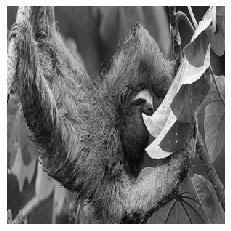

In [33]:
# Test the model
def load_test_data():
    test_data = []
    for img in os.listdir(TEST_DIR):
        label = label_img(img)
        path = os.path.join(TEST_DIR, img)

        img = Image.open(path)
        img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        test_data.append([np.array(img), label])

    shuffle(test_data)
    return test_data

test_data = load_test_data()
plt.imshow(test_data[0][0], cmap = 'gist_gray')
plt.axis('off')
plt.show()

In [34]:
# Save first 10 images for later
first_test_images = np.array([i[0] for i in test_data[:9]])
first_test_labels = np.array([i[1] for i in test_data[:9]])

test_images = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_labels = np.array([i[1] for i in test_data])

loss, acc = model.evaluate(test_images, test_labels, verbose=0)
print(acc * 100)

85.71428656578064


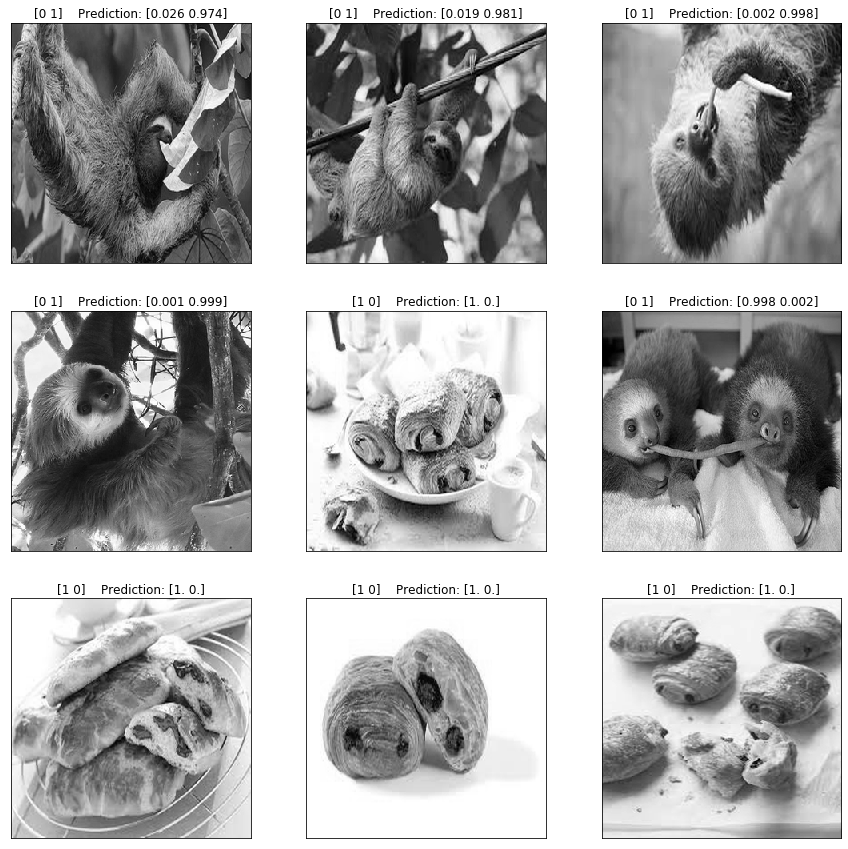

In [35]:
# Visualise the first 9 predictions
predictions = model.predict(test_images[:9])
fig= plt.figure(figsize=(15, 15))
for i, p in enumerate(predictions):
  p = np.around(p, 3)  # Round to three decimal places
  label = croissant
  if np.all(first_test_labels[i] == LABELS[sloth]):
    label = sloth
    
  plt.subplot(3, 3, i + 1), plt.imshow(first_test_images[i], cmap='gist_gray')
  plt.title(str(first_test_labels[i]) + "    Prediction: " + str(p))
  plt.xticks([]), plt.yticks([])

plt.show()